In [ ]:
#Import the required packages
import scipy
#Import package pandas for data analysis
import pandas as pd

#Import package numpy for numeric computing
import numpy as np

#Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt

#Import package seaborn for visualisation
import seaborn as sns

#For showing plots directly in the notebook run the command below
%matplotlib inline

from matplotlib.backends.backend_pdf import PdfPages

from scipy import stats

#Import all prediction packages
import sqlalchemy
from sqlalchemy import create_engine
from pandas import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn import tree
import matplotlib.pyplot as plt
import pickle
import requests
import json
import numpy as np
import datetime
import time
from time import gmtime
from time import strftime
from sklearn.metrics import mean_squared_error
import os
import xgboost


import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1 = pd.read_csv("modelPerStopMetrics.csv")

In [ ]:
mean_MAE = []
mean_RMSE = []
list_dfs = []

for stopid in unique_routes:
    df_route = df1.loc[df1['Route'] == stopid]
    route = df_route['Route'].iloc[0]
    df_route_LR = df_route.loc[df_route['Model']=='lin_reg']
    df_route_LR_1 = df_route_LR.loc[df_route_LR['Direction']==1]
    df_route_LR_2 = df_route_LR.loc[df_route_LR['Direction']==2]

    df_route_DT = df_route.loc[df_route['Model']=='decision Tree']
    df_route_DT_1 = df_route_DT.loc[df_route_DT['Direction']==1]
    df_route_DT_2 = df_route_DT.loc[df_route_DT['Direction']==2]

    df_route_RF = df_route.loc[df_route['Model']=='random forest']
    df_route_RF_1 = df_route_RF.loc[df_route_RF['Direction']==1]
    df_route_RF_2 = df_route_RF.loc[df_route_RF['Direction']==2]

    meanMAE_LR_1 = df_route_LR_1['MAE'].mean()
    meanMAE_LR_2 = df_route_LR_2['MAE'].mean()
    meanMAE_DT_1 = df_route_DT_1['MAE'].mean()
    meanMAE_DT_2 = df_route_DT_2['MAE'].mean()
    meanMAE_RF_1 = df_route_RF_1['MAE'].mean()
    meanMAE_RF_2 = df_route_RF_2['MAE'].mean()

    meanRMSE_LR_1 = df_route_LR_1['RMSE'].mean()
    meanRMSE_LR_2 = df_route_LR_2['RMSE'].mean()
    meanRMSE_DT_1 = df_route_DT_1['RMSE'].mean()
    meanRMSE_DT_2 = df_route_DT_2['RMSE'].mean()
    meanRMSE_RF_1 = df_route_RF_1['RMSE'].mean()
    meanRMSE_RF_2 = df_route_RF_2['RMSE'].mean()

    directions = ['1','2','1','2','1','2']
    models = ['Linear Regression','Linear Regression' ,'Decision Tree','Decision Tree', 'Random Forest', 'Random Forest']
    MAE_list = [ meanMAE_LR_1,meanMAE_LR_2,meanMAE_DT_1,meanMAE_DT_2, meanMAE_RF_1,meanMAE_RF_2]
    RMSE_list = [meanRMSE_LR_1,meanRMSE_LR_2,meanRMSE_DT_1,meanRMSE_DT_2,meanRMSE_RF_1,meanRMSE_RF_2]
    route_list = [route,route,route,route,route,route]


    data = {'Route':route_list,'Direction':directions,'Model':models,'MAE': MAE_list,'RMSE':RMSE_list}
    df = pd.DataFrame(data)
    list_dfs.append(df)
#     print(df)

result = pd.concat(list_dfs)
result.to_csv('ModelPerStopfullRouteMetrics.csv')

In [84]:
modelPerRoute_DT_2.plot.bar(x='Route', y='MAE',figsize=(215,80), rot =45,ylabel = 'MAE (in seconds)', title = 'Decision Tree Model MAE of each route in seconds', color = 'blue', label = 'Model per Route MAE', fontsize = 100)
# modelPerStop_DT_2.plot.bar( ax=ax, x='Route', y='MAE',figsize=(20,10),subplots=True, rot =45,ylabel = 'MAE (in seconds)', title = 'Decision Tree Model MAE of each route in seconds', label = 'Model per Stop MAE',fontsize=20)
plt.title('', fontsize = 150)
plt.xlabel('', fontsize = 100)
plt.ylabel('', fontsize = 150)
plt.xticks (fontsize=80)
plt.yticks (fontsize=300)
plt.savefig('DecisionTreeModelRouteDirection2.jpg')



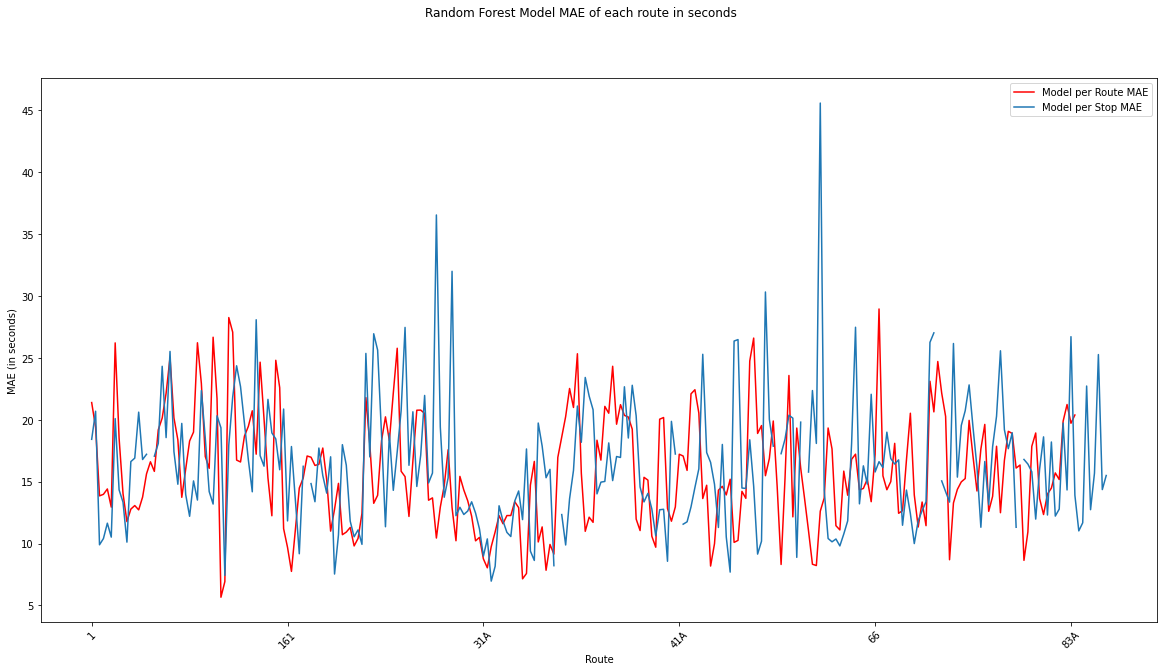

In [65]:
ax = modelPerRoute_RF.plot(x='Route', y='MAE',figsize=(20,10),subplots=True, rot =45,ylabel = 'MAE (in seconds)', title = 'Random Forest Model MAE of each route in seconds', color = 'red', label = 'Model per Route MAE')
modelPerStop_RF.plot(ax=ax, x='Route', y='MAE',figsize=(20,10),subplots=True, rot =45,ylabel = 'MAE (in seconds)', title = 'Random Forest Model MAE of each route in seconds', label = 'Model per Stop MAE')
plt.savefig('RandomForestModelStopRouteComparison.jpg')

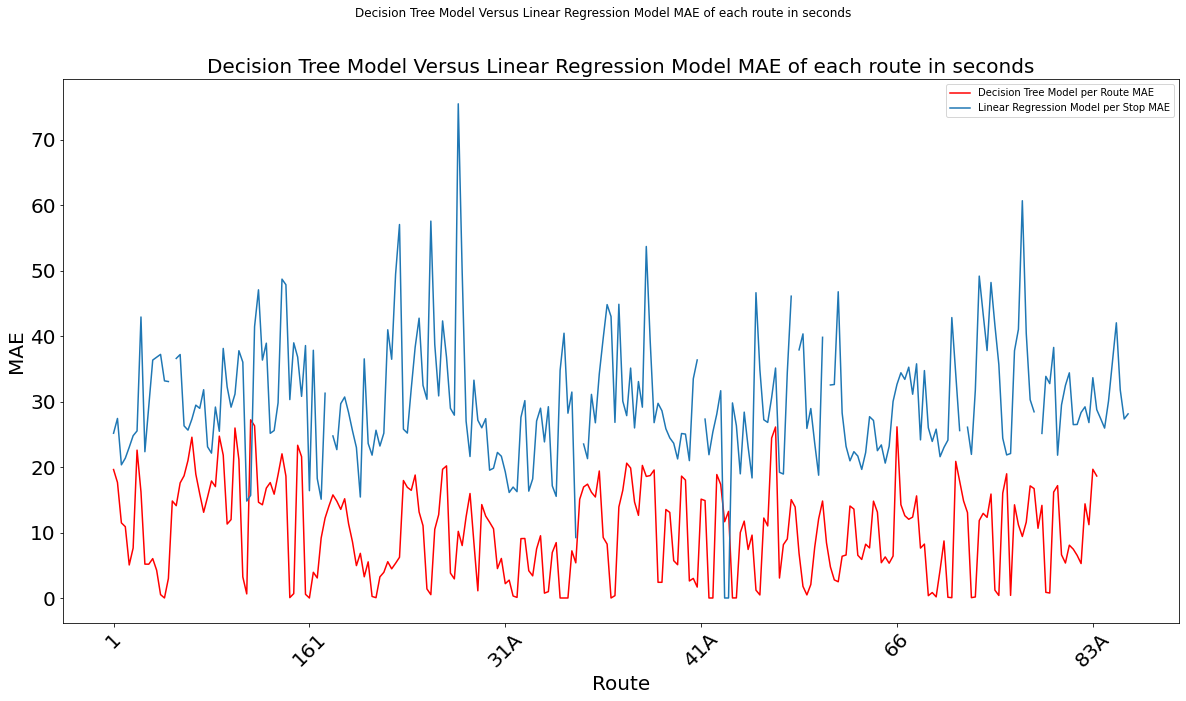

In [15]:
ax = modelPerRoute_DT.plot(x='Route', y='MAE',figsize=(20,10),subplots=True, rot =45,ylabel = 'MAE (in seconds)', title = 'Decision Tree Model Versus Linear Regression Model MAE of each route in seconds', color = 'red', label = 'Decision Tree Model per Route MAE', fontsize = 20)
modelPerStop_LR.plot(ax=ax, x='Route', y='MAE',figsize=(20,10),subplots=True, rot =45,ylabel = 'MAE (in seconds)', title = 'Decision Tree Model Versus Linear Regression Model MAE of each route in seconds', label = 'Linear Regression Model per Stop MAE', fontsize = 20)
plt.title('Decision Tree Model Versus Linear Regression Model MAE of each route in seconds', fontsize = 20)
plt.xlabel('Route', fontsize = 20)
plt.ylabel('MAE', fontsize = 20)
plt.savefig('LinearRegressionVersusDecisionTreeModelStopRouteComparison.jpg')